# CARDIOVASCULAR DATA SET EXPLORATION

Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier  
from sklearn.svm import LinearSVC

## General exploration

### Reading the csv file

In [2]:
path = '../../raw_data/CVD_cleaned.csv'

data = pd.read_csv(path)

### Preview

In [3]:
data.head()

General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   
2      Very Good     Within the past year      Yes            No          No   
3           Poor     Within the past year      Yes           Yes          No   
4           Good     Within the past year       No            No          No   

  Other_Cancer Depression Diabetes Arthritis     Sex Age_Category  \
0           No         No       No       Yes  Female        70-74   
1           No         No      Yes        No  Female        70-74   
2           No         No      Yes        No  Female        60-64   
3           No         No      Yes        No    Male        75-79   
4           No         No       No        No    Male          80+   

   Height_(cm)  Weight_(kg)    BMI Smoking_History  Alcohol_Consumption  \
0        150.0        32.66  14.54             Yes                  0.0   
1        165.0        77.11  28.29              No                  0.0   
2        163.0        88.45  33.47              No                  4.0   
3        180.0        93.44  28.73              No                  0.0   
4        191.0        88.45  24.37             Yes                  0.0   

   Fruit_Consumption  Green_Vegetables_Consumption  FriedPotato_Consumption  
0               30.0                          16.0                     12.0  
1               30.0                           0.0                      4.0  
2               12.0                           3.0                     16.0  
3               30.0                          30.0                      8.0  
4                8.0                           4.0                      0.0

In [4]:
data.describe()

Height_(cm)    Weight_(kg)            BMI  Alcohol_Consumption  \
count  308854.000000  308854.000000  308854.000000        308854.000000   
mean      170.615249      83.588655      28.626211             5.096366   
std        10.658026      21.343210       6.522323             8.199763   
min        91.000000      24.950000      12.020000             0.000000   
25%       163.000000      68.040000      24.210000             0.000000   
50%       170.000000      81.650000      27.440000             1.000000   
75%       178.000000      95.250000      31.850000             6.000000   
max       241.000000     293.020000      99.330000            30.000000   

       Fruit_Consumption  Green_Vegetables_Consumption  \
count      308854.000000                 308854.000000   
mean           29.835200                     15.110441   
std            24.875735                     14.926238   
min             0.000000                      0.000000   
25%            12.000000                      4.000000   
50%            30.000000                     12.000000   
75%            30.000000                     20.000000   
max           120.000000                    128.000000   

       FriedPotato_Consumption  
count            308854.000000  
mean                  6.296616  
std                   8.582954  
min                   0.000000  
25%                   2.000000  
50%                   4.000000  
75%                   8.000000  
max                 128.000000

In [5]:
data.shape

(308854, 19)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

### Checking if the data is cleaned

Does the data have duplicated rows?

In [7]:
data.duplicated().sum()

80

It looks like the data is not really cleaned so we have to do some work on it

In [8]:
dirty_shape = data.shape

data.drop_duplicates(inplace=True)

cleaned_shape = data.shape

print(f'The shape of the data with duplicated rows is {dirty_shape}')
print(f'The shape of the data without duplicated rows is {cleaned_shape}')
print(f'We have deleted {dirty_shape[0] - cleaned_shape[0]} rows')

The shape of the data with duplicated rows is (308854, 19)
The shape of the data without duplicated rows is (308774, 19)
We have deleted 80 rows


Does the data have null values?

In [9]:
data.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

The data does not have null values so we can operate with it. First we are going to split the data set in categorical features and numerical features in order to explore them.

In [10]:
num_data = data.select_dtypes(exclude=['object'])
cat_data = data.select_dtypes(include=['object'])

Let's start with the numerical features

In [11]:
num_data.corr()

Height_(cm)  Weight_(kg)       BMI  \
Height_(cm)                      1.000000     0.472175 -0.027413   
Weight_(kg)                      0.472175     1.000000  0.859702   
BMI                             -0.027413     0.859702  1.000000   
Alcohol_Consumption              0.128850    -0.032427 -0.108750   
Fruit_Consumption               -0.045925    -0.090611 -0.076603   
Green_Vegetables_Consumption    -0.030153    -0.075895 -0.070629   
FriedPotato_Consumption          0.108790     0.096327  0.048343   

                              Alcohol_Consumption  Fruit_Consumption  \
Height_(cm)                              0.128850          -0.045925   
Weight_(kg)                             -0.032427          -0.090611   
BMI                                     -0.108750          -0.076603   
Alcohol_Consumption                      1.000000          -0.012542   
Fruit_Consumption                       -0.012542           1.000000   
Green_Vegetables_Consumption             0.060088           0.270426   
FriedPotato_Consumption                  0.020503          -0.060302   

                              Green_Vegetables_Consumption  \
Height_(cm)                                      -0.030153   
Weight_(kg)                                      -0.075895   
BMI                                              -0.070629   
Alcohol_Consumption                               0.060088   
Fruit_Consumption                                 0.270426   
Green_Vegetables_Consumption                      1.000000   
FriedPotato_Consumption                           0.003209   

                              FriedPotato_Consumption  
Height_(cm)                                  0.108790  
Weight_(kg)                                  0.096327  
BMI                                          0.048343  
Alcohol_Consumption                          0.020503  
Fruit_Consumption                           -0.060302  
Green_Vegetables_Consumption                 0.003209  
FriedPotato_Consumption                      1.000000

<Axes: >

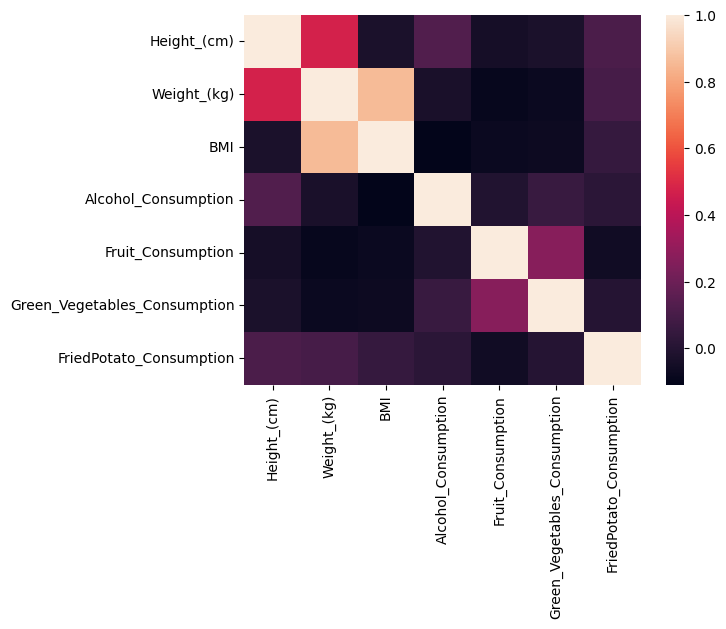

In [12]:
sns.heatmap(num_data.corr())

The Weigth and the BMI are highly correlated so we are going to drop the BMI feature and stay with the weight one, because it's more basic.

In [13]:
num_data.drop(columns=['BMI'],inplace=True)
data.drop(columns=['BMI'],inplace=True)

Now let's check the categorical features and see how many unique values they have and how many of them they have.

In [14]:
cat_data.nunique()

General_Health      5
Checkup             5
Exercise            2
Heart_Disease       2
Skin_Cancer         2
Other_Cancer        2
Depression          2
Diabetes            4
Arthritis           2
Sex                 2
Age_Category       13
Smoking_History     2
dtype: int64

In [15]:
for column in cat_data.columns:
    print(f'{column} and its values:\n{cat_data[column].value_counts()}')

cat_data.value_counts().sum()

General_Health and its values:
General_Health
Very Good    110351
Good          95355
Excellent     55929
Fair          35808
Poor          11331
Name: count, dtype: int64
Checkup and its values:
Checkup
Within the past year       239295
Within the past 2 years     37210
Within the past 5 years     17442
5 or more years ago         13420
Never                        1407
Name: count, dtype: int64
Exercise and its values:
Exercise
Yes    239305
No      69469
Name: count, dtype: int64
Heart_Disease and its values:
Heart_Disease
No     283803
Yes     24971
Name: count, dtype: int64
Skin_Cancer and its values:
Skin_Cancer
No     278782
Yes     29992
Name: count, dtype: int64
Other_Cancer and its values:
Other_Cancer
No     278897
Yes     29877
Name: count, dtype: int64
Depression and its values:
Depression
No     246875
Yes     61899
Name: count, dtype: int64
Diabetes and its values:
Diabetes
No                                            259062
Yes                                          

308774

Some of the classes are unbalanced so it may be a problem when training the model

## Preprocessing

First we process the numerical data

In [16]:
scaler = StandardScaler()
num_features = data.select_dtypes(exclude=['object']).columns
data[num_features] = scaler.fit_transform(data[num_features])

First we process the categorical data with ordinal values

In [17]:
ordinal_features = ['General_Health','Checkup','Age_Category','Diabetes']
dict = {}
for column in ordinal_features:
    dict[column] = data[column].unique()
dict

{'General_Health': array(['Poor', 'Very Good', 'Good', 'Fair', 'Excellent'], dtype=object),
 'Checkup': array(['Within the past 2 years', 'Within the past year',
        '5 or more years ago', 'Within the past 5 years', 'Never'],
       dtype=object),
 'Age_Category': array(['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49',
        '18-24', '30-34', '55-59', '35-39', '40-44', '25-29'], dtype=object),
 'Diabetes': array(['No', 'Yes', 'No, pre-diabetes or borderline diabetes',
        'Yes, but female told only during pregnancy'], dtype=object)}

In [18]:
general_health_sorted = ['Poor','Fair','Good','Very Good','Excellent']
checkup_sorted = ['Never','5 or more years ago','Within the past 5 years','Within the past 2 years','Within the past year']
diabetes_sorted = ['Yes','No, pre-diabetes or borderline diabetes','Yes, but female told only during pregnancy','No']
age_category_sorted = ['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79', '80+']   

In [19]:
data['General_Health'] = OrdinalEncoder(categories=[general_health_sorted]).fit_transform(data[['General_Health']])
data['Checkup'] = OrdinalEncoder(categories=[checkup_sorted]).fit_transform(data[['Checkup']])
data['Diabetes'] = OrdinalEncoder(categories=[diabetes_sorted]).fit_transform(data[['Diabetes']])
data['Age_Category'] = OrdinalEncoder(categories=[age_category_sorted]).fit_transform(data[['Age_Category']])

In [20]:
ohe = OneHotEncoder(drop='if_binary')

not_ordinal_features = [e for e in data.select_dtypes(include=['object']) if e not in ordinal_features]

ohe = OneHotEncoder(drop='if_binary', sparse=False)  # Añade 'sparse=False' para obtener una matriz densa
transformed_features = ohe.fit_transform(data[not_ordinal_features])

# Obtén los nombres de las columnas transformadas
column_names = ohe.get_feature_names_out(input_features=not_ordinal_features)

# Crear un DataFrame con las características transformadas y los nombres de las columnas
transformed_df = pd.DataFrame(transformed_features, columns=column_names)

# Elimina las características originales del DataFrame X
data = data.drop(columns=not_ordinal_features)

# Concatena el DataFrame original con el DataFrame de características transformadas
data = pd.concat([data, transformed_df], axis=1)





/home/nachmz42/.pyenv/versions/3.10.6/envs/mediml/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Now we split the data into train, validation and test. We have a lot of data so we can select a test_size of 0.15.

In [21]:
data.dropna(inplace=True)
X = data.drop(columns=['Heart_Disease_Yes'],axis=1)
y = data[['Heart_Disease_Yes']]
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)




y.shape

(308694, 1)

In [22]:
y

Heart_Disease_Yes
0                     0.0
1                     1.0
2                     0.0
3                     1.0
4                     0.0
...                   ...
308769                0.0
308770                0.0
308771                0.0
308772                0.0
308773                0.0

[308694 rows x 1 columns]

In [23]:
X

General_Health  Checkup  Diabetes  Age_Category  Height_(cm)  \
0                  0.0      3.0       3.0          10.0    -1.934170   
1                  3.0      4.0       0.0          10.0    -0.526833   
2                  3.0      4.0       0.0           8.0    -0.714478   
3                  0.0      4.0       0.0          11.0     0.880503   
4                  2.0      4.0       3.0          12.0     1.912549   
...                ...      ...       ...           ...          ...   
308769             3.0      4.0       3.0           8.0    -1.746525   
308770             2.0      4.0       3.0           9.0     1.631082   
308771             3.0      4.0       3.0          12.0     0.411391   
308772             3.0      4.0       3.0           1.0     0.692858   
308773             3.0      4.0       3.0           5.0    -0.714478   

        Weight_(kg)  Alcohol_Consumption  Fruit_Consumption  \
0         -2.386099            -0.621621           0.006661   
1         -0.303608            -0.621621           0.006661   
2          0.227673            -0.133842          -0.716876   
3          0.461456            -0.621621           0.006661   
4          0.227673            -0.621621          -0.877663   
...             ...                  ...                ...   
308769    -0.176175            -0.621621          -0.877663   
308770     0.014973             0.597828          -0.395304   
308771     0.163957            -0.621621           0.006661   
308772     0.121323            -0.621621          -0.716876   
308773    -0.431040             2.305058          -1.199235   

        Green_Vegetables_Consumption  FriedPotato_Consumption  Exercise_Yes  \
0                           0.059656                 0.664362           0.0   
1                          -1.012235                -0.267624           0.0   
2                          -0.811255                 1.130355           1.0   
3                           0.997561                 0.198369           1.0   
4                          -0.744262                -0.733617           0.0   
...                              ...                      ...           ...   
308769                      0.997561                -0.617119           1.0   
308770                      0.997561                -0.733617           1.0   
308771                      0.997561                -0.500620           1.0   
308772                     -0.476289                -0.267624           1.0   
308773                      0.997561                -0.733617           1.0   

        Skin_Cancer_Yes  Other_Cancer_Yes  Depression_Yes  Arthritis_Yes  \
0                   0.0               0.0             0.0            1.0   
1                   0.0               0.0             0.0            0.0   
2                   0.0               0.0             0.0            0.0   
3                   0.0               0.0             0.0            0.0   
4                   0.0               0.0             0.0            0.0   
...                 ...               ...             ...            ...   
308769              0.0               0.0             0.0            0.0   
308770              0.0               0.0             0.0            0.0   
308771              0.0               0.0             1.0            0.0   
308772              0.0               0.0             0.0            0.0   
308773              0.0               0.0             0.0            0.0   

        Sex_Male  Smoking_History_Yes  
0            0.0                  1.0  
1            0.0                  0.0  
2            0.0                  0.0  
3            1.0                  0.0  
4            1.0                  1.0  
...          ...                  ...  
308769       1.0                  0.0  
308770       1.0                  0.0  
308771       0.0                  1.0  
308772       1.0                  0.0  
308773       0.0                  0.0  

[308694 rows x 17 columns]

We repreat the split in order to get a validation set

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

The date has been minimally preprocesed so we can try a model now

In [25]:
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1)

In [26]:
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
scores = cross_validate(clf, X_train, y_train, scoring=scoring, cv=5)

/home/nachmz42/.pyenv/versions/3.10.6/envs/mediml/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nachmz42/.pyenv/versions/3.10.6/envs/mediml/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nachmz42/.pyenv/versions/3.10.6/envs/mediml/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nach

In [27]:
scores


{'fit_time': array([0.2212553 , 0.21373916, 0.2197473 , 0.22052145, 0.2177546 ]),
 'score_time': array([0.05611873, 0.05763054, 0.05741048, 0.05720949, 0.05682611]),
 'test_accuracy': array([0.91982469, 0.91982278, 0.91982278, 0.91982278, 0.9198466 ]),
 'test_precision': array([0., 0., 0., 0., 0.]),
 'test_recall': array([0., 0., 0., 0., 0.]),
 'test_f1': array([0., 0., 0., 0., 0.]),
 'test_roc_auc': array([0.72547267, 0.71365147, 0.71003645, 0.72517378, 0.72007827])}

In [28]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [29]:
y_val_pred = pd.DataFrame(pd.Series(clf.predict(X_val),name='Heart_Disease_Yes'))

In [30]:
y_val_pred

Heart_Disease_Yes
0                    0.0
1                    0.0
2                    0.0
3                    0.0
4                    0.0
...                  ...
52473                0.0
52474                0.0
52475                0.0
52476                0.0
52477                0.0

[52478 rows x 1 columns]

In [31]:
y_val.reset_index(inplace=True,drop=True)

In [32]:
type(y_val)

pandas.core.frame.DataFrame

In [33]:
# Realiza una comparación elemento a elemento y obtén una serie booleana que indica las diferencias
diferencias = y_val_pred != y_val

# Cuenta el número de True en la serie de diferencias para obtener la cantidad de datos diferentes
cantidad_diferentes = diferencias.sum()

In [34]:
cantidad_diferentes

Heart_Disease_Yes    4333
dtype: int64